## Introduction

**제목:** 제조 AI 데이터셋 가이드북  <br>
**작성자:** 정세준 <br>
**소속:** KAIST AI 대학원 성남연구센터 확률형인공지능연구실  <br>
**Description:** time series classifier로 Ford dataset를 학습하고, 엔진의 정상/비정상 여부를 판단하고자 함

#### 저장 경로 설정

In [1]:
save_path = './save/'  # 저장 경로
file_path = './Data/'  # 다운로드 받은 데이터 파일이 위치한 경로(file path)
train_fn="FordA_TRAIN.arff"  # Train 데이터 파일명
test_fn="FordA_TEST.arff"  # Test 데이터 파일명

 Dependency 불러오기(import)

In [2]:
"""
불러오고자 하는 라이브러리의 이름이 길거나, 자주 쓰는 라이브러리의 경우, 대개 약자를 쓴다.

** 흔히 통용되는 약어 **
pandas -> pd
numpy -> np 
matplotlib.pyplot -> plt
Tensorflow -> tf

"""
import itertools
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import StandardScaler, RobustScaler
import tensorflow as tf

In C:\Users\adminstrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adminstrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adminstrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\adminstrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adminstrator\anaconda3\lib\site-packages\matplotlib\

## [단계 1] 라이브러리 및 데이터 불러오기

* 방법 1: 데이터를 직접 다운로드하여 불러오기
* 방법 2: Website에서 직접 데이터(TSV 파일)를 다운로드 하기

### 방법 1

In [3]:
file_path = './data/'  # 사용자 Local 환경 내의 다운로드 받은 데이터 파일이 위치한 경로
train_fn="FordA_TRAIN.arff"  # Train 데이터 파일명
test_fn="FordA_TEST.arff"  # Test 데이터 파일명

def read_ariff(path):
    """
    .ariff 확장자를 Load하기 위한 함수
    """
    raw_data, meta = loadarff(path)
    cols = [x for x in meta]
    data2d = np.zeros([raw_data.shape[0],len(cols)])
    for i,col in zip(range(len(cols)),cols):
        data2d[:,i]=raw_data[col]
    return data2d

train = read_ariff(file_path + train_fn)
test = read_ariff(file_path + test_fn)

print("train_set.shape:", train.shape)
print("test_set.shape:", test.shape)

train_set.shape: (3601, 501)
test_set.shape: (1320, 501)


### 방법2

In [4]:
"""
def read_file(file_path_url):  # 입력: 파일 경로(url)

    #tsv 확장자를 Load하기 위한 함수

    #return np.loadtxt(file_path_url, delimiter="\t")

root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"  # url root

 #방법 2로 진행을 원할 경우, 아래의 Code를 주석 해제하고 실행

train = read_file(root_url + "FordA_TRAIN.tsv")
test = read_file(root_url + "FordA_TEST.tsv")

print("train_set.shape:", train.shape)
print("test_set.shape:", test.shape)
"""

'\ndef read_file(file_path_url):  # 입력: 파일 경로(url)\n\n    #tsv 확장자를 Load하기 위한 함수\n\n    #return np.loadtxt(file_path_url, delimiter="\t")\n\nroot_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"  # url root\n\n #방법 2로 진행을 원할 경우, 아래의 Code를 주석 해제하고 실행\n\ntrain = read_file(root_url + "FordA_TRAIN.tsv")\ntest = read_file(root_url + "FordA_TEST.tsv")\n\nprint("train_set.shape:", train.shape)\nprint("test_set.shape:", test.shape)\n'

In [5]:
# 데이터 불러오기 방법 1 기준 데이터를 불러왔을 경우, 아래의 주석을 해제
x_train_temp = train[:,:-1]
y_train_temp = train[:, -1]  # 마지막 column이 Label 값이 있는 column
x_test = test[:, :-1]
y_test = test[:, -1]  # 마지막 column이 Label 값이 있는 column

# # 데이터 불러오기 방법 2로 데이터를 불러왔을 경우, 아래의 주석을 해제
#x_train_temp = train[:, 1:]
#y_train_temp = train[:, 0]  # 첫번 째 column이 Label 값이 있는 column
#x_test = test[:, 1:]
#y_test = test[:, 0]  # 첫번 째 column이 Label 값이 있는 column

데이터를 불러온 후, 아래 코드를 실행

In [6]:
normal_x = x_train_temp[y_train_temp==1]  # Train_x 데이터 중 정상 데이터
abnormal_x = x_train_temp[y_train_temp==-1]  # Train_x 데이터 중 비정상 데이터
normal_y = y_train_temp[y_train_temp==1]  # Train_y 데이터 중 정상 데이터
abnormal_y = y_train_temp[y_train_temp==-1]  # Train_y 데이터 중 비정상 데이터

In [7]:
ind_x_normal = int(normal_x.shape[0]*0.8)  # train_x 데이터를 8:2로 나누기 위한 기준 인덱스 설정
ind_y_normal = int(normal_y.shape[0]*0.8)  # train_y 데이터를 8:2로 나누기 위한 기준 인덱스 설정
ind_x_abnormal = int(abnormal_x.shape[0]*0.8)  # train_x 데이터를 8:2로 나누기 위한 기준 인덱스 설정
ind_y_abnormal = int(abnormal_y.shape[0]*0.8)  # train_y 데이터를 8:2로 나누기 위한 기준 인덱스 설정

In [8]:
x_train = np.concatenate((normal_x[:ind_x_normal], abnormal_x[:ind_x_abnormal]), axis=0)
x_valid = np.concatenate((normal_x[ind_x_normal:], abnormal_x[ind_x_abnormal:]), axis=0)
y_train = np.concatenate((normal_y[:ind_y_normal], abnormal_y[:ind_y_abnormal]), axis=0)
y_valid = np.concatenate((normal_y[ind_y_normal:], abnormal_y[ind_y_abnormal:]), axis=0)

In [9]:
print("x_train.shape:", x_train.shape)
print("x_valid.shape:", x_valid.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (2880, 500)
x_valid.shape: (721, 500)
y_train.shape: (2880,)
y_valid.shape: (721,)
x_test.shape: (1320, 500)
y_test.shape: (1320,)


## [단계 2] 데이터 시각화


### 시각화 I: 데이터 불균형(Data Imbalance) 확인


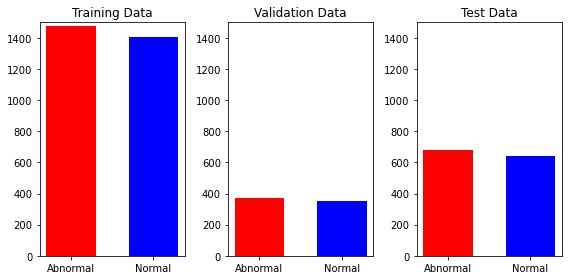

In [10]:
# Class의 종류 확인: 정상 1, 비정상 -1
classes = np.unique(np.concatenate((y_train, y_test), axis=0))  # classes = array([-1,  1])

x = np.arange(len(classes))  # Plot의 X축의 개수 구하기
labels = ["Abnormal", "Normal"]   # Plot의 X축의 이름 구하기

values_train = [(y_train == i).sum() for i in classes]  # Train 데이터의 정상/비정상 각 총 개수
values_valid = [(y_valid == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수
values_test = [(y_test == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수

plt.figure(figsize=(8,4))  # Plot 틀(Figure)의 Size 설정 (5X3)

plt.subplot(1,3,1)   # Plot 틀(Figure) 내 3개의 subplot 중 첫 번째(왼쪽) 지정
plt.title("Training Data")  # subplot 제목
plt.bar(x, values_train, width=0.6, color=["red", "blue"])  # Train 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 1500])
plt.xticks(x, labels)  # X축에 변수 기입

plt.subplot(1,3,2)  # Plot 틀(Figure) 내 3개의 subplot 중 두 번째(가운데) 지정
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6, color=["red", "blue"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 1500])
plt.xticks(x, labels)  

plt.subplot(1,3,3)  # Plot 틀(Figure) 내 3개의 subplot 중 세 번째(오른쪽) 지정
plt.title("Test Data")
plt.bar(x, values_test, width=0.6, color=["red", "blue"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 1500])
plt.xticks(x, labels)

plt.tight_layout()  # 그림 저장
plt.savefig(save_path + 'data_imbalance.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()  # 그림 출력

### 시각화 II-1: 특정 시간에서의 시계열 샘플을 플롯

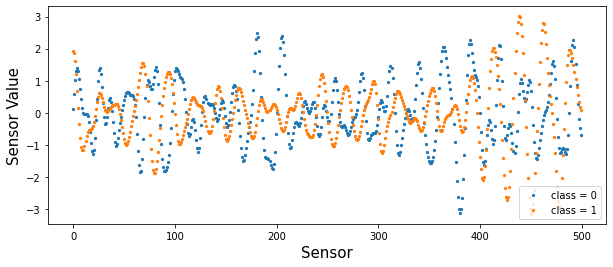

In [12]:
import random

labels = np.unique(np.concatenate((y_train, y_test), axis=0))  # labels (-1 or 1)

plt.figure(figsize = (10, 4))
for c in labels:
    c_x_train = x_train[y_train == c]
    if c == -1: c = c + 1  # 편의 상 Abnormal Class(-1)를 0으로 조정
    time_t = random.randint(0, c_x_train.shape[0]) # 0~1404 사이의 랜덤한 정수가 특정 time t가 됨
    plt.scatter(range(0, 500), c_x_train[time_t], label="class = " + str(int(c)), marker='o', s=5)
    
plt.legend(loc="lower right")
plt.xlabel("Sensor", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)
plt.savefig(save_path + 'ford_data_ts_sample1.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

### 시각화 II-2: 특정 시간에서의 시계열 샘플을 플롯 (정상/비정상 샘플 각각 출력)

비정상 Label 데이터 수:  1476


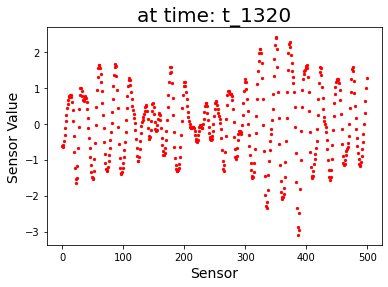

정상 Label 데이터 수:  1404


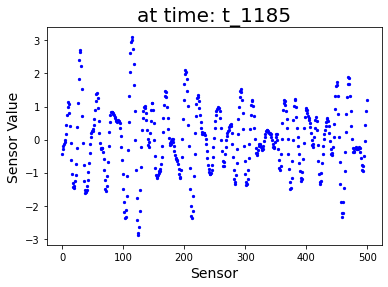

In [13]:
def get_scatter_plot(c):
    time_t = random.randint(0, c_x_train.shape[0])  # 0~1404 사이의 랜덤한 정수가 특정 time t가 됨
    plt.scatter(range(0, c_x_train.shape[1]), c_x_train[time_t], 
                marker='o', s=5, c="r" if c == -1  else "b")
    plt.title("at time: t_{}".format(time_t), fontsize=20)
    plt.xlabel("Sensor", fontsize=14)
    plt.ylabel("Sensor Value", fontsize=14)
    plt.savefig(save_path + '{state}.png'.format(state="abnormal" if c == -1 else "normal"), 
                dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()

labels = np.unique(np.concatenate((y_train, y_test), axis=0))

for c in labels:
    c_x_train = x_train[y_train == c]
    if c == -1:
        print("비정상 Label 데이터 수: ", len(c_x_train))
        get_scatter_plot(c)
    else:
        print("정상 Label 데이터 수: ", len(c_x_train))
        get_scatter_plot(c)

### 시각화 III: 1개의 임의의 센서 값의 시계열 Plot

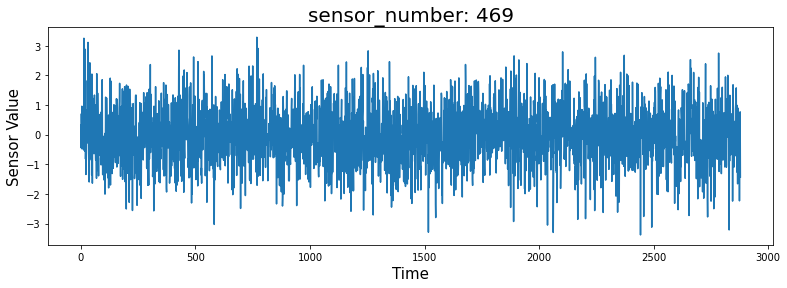

In [14]:
sensor_number = random.randint(0, 500)  # 0~500 사이의 랜덤한 정수가 Sensor 번호가 됨

plt.figure(figsize = (13, 4))
plt.title("sensor_number: {}".format(sensor_number), fontsize=20)
plt.plot(x_train[:, sensor_number])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)
plt.savefig(save_path + 'ford_a_sensor.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

## [단계 3] 데이터 특성 파악

### 상관관계 분석

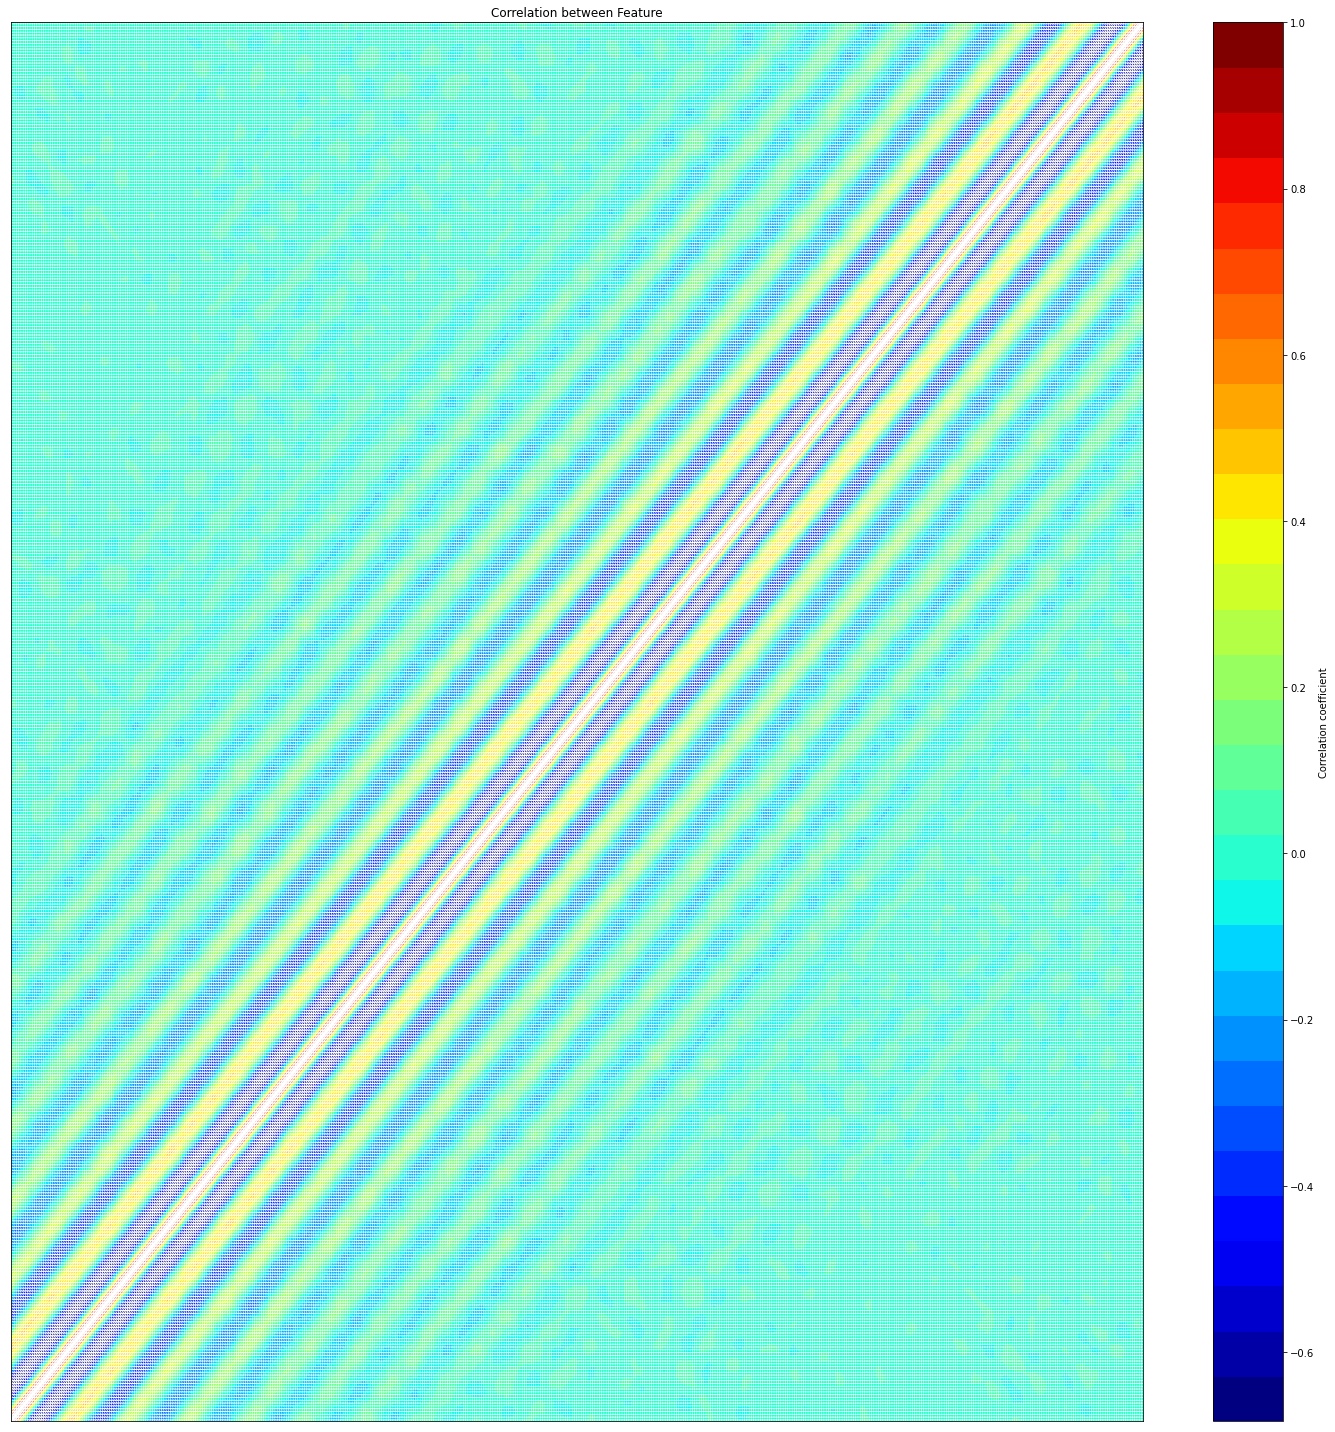

In [15]:
import matplotlib.cm as cm
from matplotlib.collections import EllipseCollection

df = pd.DataFrame(data = x_train, 
                  columns= ["sensor_{}".format(label+1) for label in range(x_train.shape[1])])

data = df.corr()

def plot_corr_ellipses(data, ax =None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec


fig, ax = plt.subplots(1, 1, figsize=(20, 20))
cmap = cm.get_cmap('jet', 31)
m = plot_corr_ellipses(data, ax=ax, cmap=cmap)
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
# ax.margins(0.1)

plt.title('Correlation between Feature')
# labels = label
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.tight_layout()
plt.savefig(save_path + 'corr.png', dpi=100, bbox_inches='tight')  # 그림 저장

plt.show()

## [단계 4] 데이터 전처리


### 데이터 정규화

동일 시간 길이(3,600) 내 센서 값들이 상당히 다양한 Range에 퍼져 있으므로, 그대로 학습을 하기엔 적절하지 않다. 일반적으로 인풋 값들을 정규화(Normalization)하는데, 본 가이드북에서는 Robustscaler를 활용하여 진행하였다. Time series 데이터의 분류 문제를 푸는 데 흔히 사용되는 방법이다.

공정 데이터에 나타나는 Outlier에도 Robust한 정규화를 위해 Robust Scaler를 사용함
StandardScalar는 데이터를 단위 분산으로 조정함으로써 Outlier에 취약할 수 있는 반면, RobustScaler는 Feature 간 같은 스케일을 갖게 되지만 평균과 분산 대신 중간 값(median)과 사분위값(quartile)을 사용함으로써, 극단값(Outlier)에 영향을 받지 않음

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Standard Scaler를 적용하고 싶을 경우 아래 Code를 실행

stder = StandardScaler()
stder.fit(x_train)
x_train = stder.transform(x_train)
x_valid = stder.transform(x_valid)

# Robust Scaler를 적용하고 싶을 경우 아래 주석을 해제하고 Code를 실행

# rscaler = RobustScaler() 
# rscaler.fit(x_train)
# x_train = rscaler.transform(x_train)
# x_valid = rscaler.transform(x_valid)



본 데이터는 Multivariate이며, 1개의 Channel만 갖는다.
우리는 multivariate variable with one channel 형태로 바꿔주고자 하며, 이는 아래와 같다.

In [17]:
# CNN, RNN 모델의 입력 변수는 채널 축 1개 차원을 확장시킨 3D Tensor이다.
# 즉 아래 CNN, RNN 모델은 x_train, x_valid, x_test를 입력 변수로 넣지 않고, 
# x_train_exp, x_valid_exp, x_test_exp을 넣는다. 
x_train_exp = np.expand_dims(x_train, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_train
x_valid_exp = np.expand_dims(x_valid, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_vaild 
x_test_exp = np.expand_dims(x_test, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_test

# 위와 동일한 코드
# x_train_exp = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
# x_valid_exp = x_train.reshape((x_valid.shape[0], x_valid.shape[1], 1))
# x_test_exp = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print("x_train_exp의 형태:", x_train_exp.shape)
print("x_valid_exp의 형태:", x_valid_exp.shape)
print("x_test_exp의 형태:", x_test_exp.shape)

x_train_exp의 형태: (2880, 500, 1)
x_valid_exp의 형태: (721, 500, 1)
x_test_exp의 형태: (1320, 500, 1)


label( 비정상: -1 또는 정상: 1) 값을 Positive Value로 바꿔준다.

In [18]:
y_train[y_train == -1] = 0
y_valid[y_valid == -1] = 0
y_test[y_test == -1] = 0

In [19]:
num_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
num_classes

2

## 모델 구축



### 1. 로지스틱 회귀

(1) Scikit-Learn 라이브러리 활용

In [20]:
from sklearn.linear_model import LogisticRegression

clf_lr_1 = LogisticRegression(penalty='l2',
                         tol=0.0001, 
                         C=1, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         random_state=2, 
                         solver='lbfgs', 
                         max_iter=1000,
                         multi_class='auto',
                         verbose=0)

(2) Numpy로 구현(from Scratch)

In [21]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.eps = 1e-10
        self.threshold = 0.5
        self.loss_history = list()
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def __loss(self, h, y):
        return (-y * np.log(h+ self.eps) - (1 - y) * np.log(1 - h + self.eps)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            logit = np.dot(X, self.theta)
            hypothesis = self.__sigmoid(logit)
            gradient = np.dot(X.T, (hypothesis - y)) / y.size
            self.theta -= self.lr * gradient
            
            if self.verbose == True and i % 10 == 0:
                loss = self.__loss(hypothesis, y)
                print(f'epoch: {i} \t loss: {loss} \t')
                self.loss_history.append(loss)
        return self.loss_history
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        predicted_labels = np.where(self.predict_prob(X) > self.threshold, 1, 0)
        return predicted_labels

    def eval(self, x, y):
        res_y = np.round(self.predict_prob(x), 0)
        accuracy = np.sum(res_y==y) / len(y)

        return accuracy

### 2. XGBoost

In [24]:
!pip install xgboost
from xgboost import XGBClassifier

"""
# 반드시 튜닝해야할 파라미터는  min_child_weight / max_depth / gamma
"""

xgb = XGBClassifier(
    learning_rate=0.1, 
    n_estimators=500, 
    max_depth=5,
    min_child_weight=3, 
    gamma=0.2, 
    subsample=0.6, 
    colsample_bytree=1.0,
    objective='binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, 
    seed=27)

### 3. 순환 신경망(RNN)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense

def make_rnn_model():
    model = Sequential()
    model.add(LSTM(units=256, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

rnn_model = make_rnn_model()


### 4. 합성곱 신경망(CNN)
Fully Convolutional Neural Network 을 설계하며, 본 모델은 다음 
[논문](https://arxiv.org/abs/1611.06455)을 참조하였다.
본 implementation은 Tensorflow 2.0을 기준으로 작성하였다.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()

## [단계 6] 모델 학습

### 6-1. 로지스틱 회귀 학습

In [27]:
x_train_lr = np.concatenate((x_train, x_valid), axis=0)  # 로지스틱 회귀 학습용 데이터
y_train_lr = np.concatenate((y_train, y_valid), axis=0)  # 로지스틱 회귀 테스트용 데이터

(1) scikit learn 모델 학습

In [28]:
clf_lr_1.fit(x_train_lr, y_train_lr)

LogisticRegression(C=1, max_iter=1000, random_state=2)

(2) numpy로 구현한 모델 학습

In [29]:
# make and fit model

clf_lr_2 = LogisticRegression(lr=0.01, num_iter=1000, verbose=True)
history_lr = clf_lr_2.fit(x_train_lr, y_train_lr)

epoch: 0 	 loss: 0.6931471803599453 	
epoch: 10 	 loss: 0.6904899637675816 	
epoch: 20 	 loss: 0.6889239094938908 	
epoch: 30 	 loss: 0.6877765367187595 	
epoch: 40 	 loss: 0.6868688414532079 	
epoch: 50 	 loss: 0.6861264028512316 	
epoch: 60 	 loss: 0.685506647126465 	
epoch: 70 	 loss: 0.6849811804514382 	
epoch: 80 	 loss: 0.6845297410991716 	
epoch: 90 	 loss: 0.6841373605861225 	
epoch: 100 	 loss: 0.6837927364357145 	
epoch: 110 	 loss: 0.6834871959245933 	
epoch: 120 	 loss: 0.683213997239752 	
epoch: 130 	 loss: 0.682967841058459 	
epoch: 140 	 loss: 0.6827445205184289 	
epoch: 150 	 loss: 0.6825406655388403 	
epoch: 160 	 loss: 0.6823535532062365 	
epoch: 170 	 loss: 0.6821809653950383 	
epoch: 180 	 loss: 0.6820210807339536 	
epoch: 190 	 loss: 0.6818723918967042 	
epoch: 200 	 loss: 0.6817336417848234 	
epoch: 210 	 loss: 0.6816037739451478 	
epoch: 220 	 loss: 0.6814818938053722 	
epoch: 230 	 loss: 0.6813672381930465 	
epoch: 240 	 loss: 0.681259151239424 	
epoch: 250 	 lo

### 6-2. XGBoost 학습

In [30]:
from sklearn.model_selection import GridSearchCV

# grid search를 하고 싶을 경우 아래 Code를 주석 해제

parameters = {
    "learning_rate" : [0.1, 0.01, 0.001, 0.0001],
   # "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
      "min_child_weight" : [ 1, 3, 5, 7 ],
      "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4],
      "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
      }

grid = GridSearchCV(xgb,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=5)
grid.fit(
    x_train.squeeze(), 
    y_train, 
    eval_metric="auc", 
    eval_set=[(x_train, y_train), (x_valid, y_valid)], 
    verbose=True)

C:\Users\adminstrator\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.69230	validation_1-auc:0.57070
[1]	validation_0-auc:0.74030	validation_1-auc:0.59520
[2]	validation_0-auc:0.76610	validation_1-auc:0.58090
[3]	validation_0-auc:0.81282	validation_1-auc:0.63019
[4]	validation_0-auc:0.83076	validation_1-auc:0.64831
[5]	validation_0-auc:0.84954	validation_1-auc:0.65138
[6]	validation_0-auc:0.86268	validation_1-auc:0.65579
[7]	validation_0-auc:0.87277	validation_1-auc:0.64977
[8]	validation_0-auc:0.89418	validation_1-auc:0.66413
[9]	validation_0-auc:0.89747	validation_1-auc:0.66320
[10]	validation_0-auc:0.90518	validation_1-auc:0.66031
[11]	validation_0-auc:0.91496	validation_1-auc:0.67263
[12]	validation_0-auc:0.92099	validation_1-auc:0.67932
[13]	validation_0-auc:0.92767	validation_1-auc:0.68303
[14]	validation_0-auc:0.93185	validation_1-auc:0.68000
[15]	validation_0-auc:0.93498	validation_1-auc:0.67906
[16]	validation_0-auc:0.93731	validation_1-auc:0.67558
[17]	validation_0-auc:0.94379	validation_1-auc:0.67789
[18]	validation_0-au

[149]	validation_0-auc:1.00000	validation_1-auc:0.80582
[150]	validation_0-auc:1.00000	validation_1-auc:0.80703
[151]	validation_0-auc:1.00000	validation_1-auc:0.80842
[152]	validation_0-auc:1.00000	validation_1-auc:0.80878
[153]	validation_0-auc:1.00000	validation_1-auc:0.80889
[154]	validation_0-auc:1.00000	validation_1-auc:0.80942
[155]	validation_0-auc:1.00000	validation_1-auc:0.80959
[156]	validation_0-auc:1.00000	validation_1-auc:0.80952
[157]	validation_0-auc:1.00000	validation_1-auc:0.80919
[158]	validation_0-auc:1.00000	validation_1-auc:0.80862
[159]	validation_0-auc:1.00000	validation_1-auc:0.80972
[160]	validation_0-auc:1.00000	validation_1-auc:0.81000
[161]	validation_0-auc:1.00000	validation_1-auc:0.81026
[162]	validation_0-auc:1.00000	validation_1-auc:0.80958
[163]	validation_0-auc:1.00000	validation_1-auc:0.81143
[164]	validation_0-auc:1.00000	validation_1-auc:0.81203
[165]	validation_0-auc:1.00000	validation_1-auc:0.81182
[166]	validation_0-auc:1.00000	validation_1-auc:

[296]	validation_0-auc:1.00000	validation_1-auc:0.84196
[297]	validation_0-auc:1.00000	validation_1-auc:0.84241
[298]	validation_0-auc:1.00000	validation_1-auc:0.84276
[299]	validation_0-auc:1.00000	validation_1-auc:0.84233
[300]	validation_0-auc:1.00000	validation_1-auc:0.84193
[301]	validation_0-auc:1.00000	validation_1-auc:0.84172
[302]	validation_0-auc:1.00000	validation_1-auc:0.84173
[303]	validation_0-auc:1.00000	validation_1-auc:0.84180
[304]	validation_0-auc:1.00000	validation_1-auc:0.84183
[305]	validation_0-auc:1.00000	validation_1-auc:0.84163
[306]	validation_0-auc:1.00000	validation_1-auc:0.84189
[307]	validation_0-auc:1.00000	validation_1-auc:0.84257
[308]	validation_0-auc:1.00000	validation_1-auc:0.84254
[309]	validation_0-auc:1.00000	validation_1-auc:0.84247
[310]	validation_0-auc:1.00000	validation_1-auc:0.84277
[311]	validation_0-auc:1.00000	validation_1-auc:0.84303
[312]	validation_0-auc:1.00000	validation_1-auc:0.84274
[313]	validation_0-auc:1.00000	validation_1-auc:

[443]	validation_0-auc:1.00000	validation_1-auc:0.85186
[444]	validation_0-auc:1.00000	validation_1-auc:0.85184
[445]	validation_0-auc:1.00000	validation_1-auc:0.85147
[446]	validation_0-auc:1.00000	validation_1-auc:0.85142
[447]	validation_0-auc:1.00000	validation_1-auc:0.85148
[448]	validation_0-auc:1.00000	validation_1-auc:0.85157
[449]	validation_0-auc:1.00000	validation_1-auc:0.85161
[450]	validation_0-auc:1.00000	validation_1-auc:0.85120
[451]	validation_0-auc:1.00000	validation_1-auc:0.85150
[452]	validation_0-auc:1.00000	validation_1-auc:0.85175
[453]	validation_0-auc:1.00000	validation_1-auc:0.85184
[454]	validation_0-auc:1.00000	validation_1-auc:0.85190
[455]	validation_0-auc:1.00000	validation_1-auc:0.85190
[456]	validation_0-auc:1.00000	validation_1-auc:0.85200
[457]	validation_0-auc:1.00000	validation_1-auc:0.85223
[458]	validation_0-auc:1.00000	validation_1-auc:0.85208
[459]	validation_0-auc:1.00000	validation_1-auc:0.85223
[460]	validation_0-auc:1.00000	validation_1-auc:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=1.0, gamma=0.2,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None, nth...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.6,
                                     tree_method=No

In [31]:
print('Start Training')
xgb.fit(
    x_train, 
    y_train, 
    eval_metric= ['auc', 'error'],
    eval_set=[(x_train, y_train), (x_valid, y_valid)], 
    verbose=True
)


Start Training
[0]	validation_0-auc:0.68377	validation_0-error:0.35208	validation_1-auc:0.55657	validation_1-error:0.44522
[1]	validation_0-auc:0.73008	validation_0-error:0.33125	validation_1-auc:0.60576	validation_1-error:0.41748
[2]	validation_0-auc:0.75630	validation_0-error:0.31562	validation_1-auc:0.60984	validation_1-error:0.41748
[3]	validation_0-auc:0.79966	validation_0-error:0.27604	validation_1-auc:0.61794	validation_1-error:0.40638
[4]	validation_0-auc:0.81864	validation_0-error:0.26181	validation_1-auc:0.64499	validation_1-error:0.38280
[5]	validation_0-auc:0.83360	validation_0-error:0.24931	validation_1-auc:0.64580	validation_1-error:0.38558
[6]	validation_0-auc:0.85182	validation_0-error:0.23924	validation_1-auc:0.66291	validation_1-error:0.39528
[7]	validation_0-auc:0.86319	validation_0-error:0.22396	validation_1-auc:0.66636	validation_1-error:0.37864
[8]	validation_0-auc:0.88640	validation_0-error:0.19792	validation_1-auc:0.68400	validation_1-error:0.37725
[9]	validatio

[76]	validation_0-auc:0.99730	validation_0-error:0.02083	validation_1-auc:0.80057	validation_1-error:0.27462
[77]	validation_0-auc:0.99752	validation_0-error:0.01979	validation_1-auc:0.80102	validation_1-error:0.27323
[78]	validation_0-auc:0.99778	validation_0-error:0.01771	validation_1-auc:0.80017	validation_1-error:0.27323
[79]	validation_0-auc:0.99784	validation_0-error:0.01840	validation_1-auc:0.80153	validation_1-error:0.26768
[80]	validation_0-auc:0.99808	validation_0-error:0.01701	validation_1-auc:0.80286	validation_1-error:0.26491
[81]	validation_0-auc:0.99818	validation_0-error:0.01632	validation_1-auc:0.80277	validation_1-error:0.27185
[82]	validation_0-auc:0.99822	validation_0-error:0.01806	validation_1-auc:0.80151	validation_1-error:0.27185
[83]	validation_0-auc:0.99843	validation_0-error:0.01632	validation_1-auc:0.80001	validation_1-error:0.27739
[84]	validation_0-auc:0.99846	validation_0-error:0.01597	validation_1-auc:0.80045	validation_1-error:0.27601
[85]	validation_0-a

[151]	validation_0-auc:0.99998	validation_0-error:0.00208	validation_1-auc:0.82630	validation_1-error:0.24965
[152]	validation_0-auc:0.99998	validation_0-error:0.00243	validation_1-auc:0.82655	validation_1-error:0.24410
[153]	validation_0-auc:0.99999	validation_0-error:0.00174	validation_1-auc:0.82738	validation_1-error:0.24272
[154]	validation_0-auc:0.99999	validation_0-error:0.00174	validation_1-auc:0.82784	validation_1-error:0.25104
[155]	validation_0-auc:0.99999	validation_0-error:0.00208	validation_1-auc:0.82740	validation_1-error:0.24827
[156]	validation_0-auc:0.99999	validation_0-error:0.00174	validation_1-auc:0.82628	validation_1-error:0.25381
[157]	validation_0-auc:0.99999	validation_0-error:0.00139	validation_1-auc:0.82609	validation_1-error:0.24965
[158]	validation_0-auc:0.99999	validation_0-error:0.00139	validation_1-auc:0.82651	validation_1-error:0.25243
[159]	validation_0-auc:0.99999	validation_0-error:0.00139	validation_1-auc:0.82706	validation_1-error:0.25520
[160]	vali

[226]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.83960	validation_1-error:0.23162
[227]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84037	validation_1-error:0.22885
[228]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.83986	validation_1-error:0.22746
[229]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84044	validation_1-error:0.22746
[230]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84163	validation_1-error:0.23024
[231]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84153	validation_1-error:0.23301
[232]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84223	validation_1-error:0.22885
[233]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84176	validation_1-error:0.22885
[234]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84075	validation_1-error:0.23301
[235]	vali

[301]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84659	validation_1-error:0.23994
[302]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84625	validation_1-error:0.23578
[303]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84606	validation_1-error:0.23856
[304]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84664	validation_1-error:0.23440
[305]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84643	validation_1-error:0.23717
[306]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84663	validation_1-error:0.23717
[307]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84597	validation_1-error:0.23578
[308]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84620	validation_1-error:0.23856
[309]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84635	validation_1-error:0.23717
[310]	vali

[376]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84713	validation_1-error:0.23440
[377]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84679	validation_1-error:0.23717
[378]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84686	validation_1-error:0.23717
[379]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84759	validation_1-error:0.23856
[380]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84771	validation_1-error:0.23440
[381]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84826	validation_1-error:0.23301
[382]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84799	validation_1-error:0.23717
[383]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84755	validation_1-error:0.23440
[384]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84738	validation_1-error:0.23717
[385]	vali

[451]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84752	validation_1-error:0.24133
[452]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84747	validation_1-error:0.23856
[453]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84753	validation_1-error:0.23717
[454]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84745	validation_1-error:0.23856
[455]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84744	validation_1-error:0.23856
[456]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84739	validation_1-error:0.23578
[457]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84735	validation_1-error:0.23717
[458]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84740	validation_1-error:0.23578
[459]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.84748	validation_1-error:0.23856
[460]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

### 6-3. 순환 신경망(RNN) 학습

In [32]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

epochs= 100
batch_size = 64

rnn_model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer='adam', 
                  metrics=["sparse_categorical_accuracy"]
                 )

callbacks = [ModelCheckpoint(save_path + 'rnn_best_model.h5', 
                             monitor='val_loss',
                             save_best_only=True),
             ReduceLROnPlateau(
                 monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
                 ),
             EarlyStopping(monitor="val_loss", patience=10, verbose=1)
             ]

history_rnn = rnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2880 samples, validate on 721 samples
Epoch 1/100
2880/2880 [==============================] - 110s 38ms/sample - loss: 0.6780 - sparse_categorical_accuracy: 0.6194 - val_loss: 0.6156 - val_sparse_categorical_accuracy: 0.6810
Epoch 2/100
2880/2880 [==============================] - 171s 59ms/sample - loss: 0.5451 - sparse_categorical_accuracy: 0.7312 - val_loss: 0.5789 - val_sparse_categorical_accuracy: 0.6921
Epoch 3/100
2880/2880 [==============================] - 216s 75ms/sample - loss: 0.4714 - sparse_categorical_accuracy: 0.7872 - val_loss: 0.5729 - val_sparse_categorical_accuracy: 0.7032
Epoch 4/100
2880/2880 [==============================] - 246s 86ms/sample - loss: 0.4023 - sparse_categorical_accuracy: 0.8306 - val_loss: 0.5825 - val_sparse_categorical_accuracy: 0.7018
Epoch 5/100
2880/2880 [===

### 6-4. 합성곱 신경망(CNN) 학습

In [33]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

epochs = 300
batch_size = 64

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)


Train on 2880 samples, validate on 721 samples
Epoch 1/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.5891 - sparse_categorical_accuracy: 0.6896 - val_loss: 0.7020 - val_sparse_categorical_accuracy: 0.4868
Epoch 2/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.4858 - sparse_categorical_accuracy: 0.7694 - val_loss: 0.7646 - val_sparse_categorical_accuracy: 0.4868
Epoch 3/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.4424 - sparse_categorical_accuracy: 0.7816 - val_loss: 0.8313 - val_sparse_categorical_accuracy: 0.4868
Epoch 4/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.4265 - sparse_categorical_accuracy: 0.7934 - val_loss: 0.8319 - val_sparse_categorical_accuracy: 0.4868
Epoch 5/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.4204 - sparse_categorical_accuracy: 0.7951 - val_loss: 0.7739 - val_sparse_categorical_accuracy: 0.4868
Epoch 6/300
2880/2880 [

2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2745 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.4795 - val_sparse_categorical_accuracy: 0.7184
Epoch 45/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2737 - sparse_categorical_accuracy: 0.8875 - val_loss: 0.3039 - val_sparse_categorical_accuracy: 0.8849
Epoch 46/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2714 - sparse_categorical_accuracy: 0.8847 - val_loss: 0.4035 - val_sparse_categorical_accuracy: 0.7989
Epoch 47/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2779 - sparse_categorical_accuracy: 0.8813 - val_loss: 0.4345 - val_sparse_categorical_accuracy: 0.7545
Epoch 48/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2837 - sparse_categorical_accuracy: 0.8819 - val_loss: 0.6120 - val_sparse_categorical_accuracy: 0.7032
Epoch 49/300
2880/2880 [==============================] - 13s 4ms/sample - los

Epoch 88/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2205 - sparse_categorical_accuracy: 0.9128 - val_loss: 0.3625 - val_sparse_categorical_accuracy: 0.8239
Epoch 89/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2232 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.2929 - val_sparse_categorical_accuracy: 0.8613
Epoch 90/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2446 - sparse_categorical_accuracy: 0.8931 - val_loss: 0.2584 - val_sparse_categorical_accuracy: 0.9085
Epoch 91/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2326 - sparse_categorical_accuracy: 0.8990 - val_loss: 0.2651 - val_sparse_categorical_accuracy: 0.8890
Epoch 92/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.2246 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.2639 - val_sparse_categorical_accuracy: 0.8849
Epoch 93/300
2880/2880 [==============================] - 13s 4ms

Epoch 132/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.1734 - sparse_categorical_accuracy: 0.9299 - val_loss: 0.1903 - val_sparse_categorical_accuracy: 0.9376
Epoch 133/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.1737 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.2413 - val_sparse_categorical_accuracy: 0.9071
Epoch 134/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.1647 - sparse_categorical_accuracy: 0.9375 - val_loss: 0.1953 - val_sparse_categorical_accuracy: 0.9140
Epoch 135/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.1716 - sparse_categorical_accuracy: 0.9340 - val_loss: 0.1995 - val_sparse_categorical_accuracy: 0.9223
Epoch 136/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.1733 - sparse_categorical_accuracy: 0.9316 - val_loss: 0.2135 - val_sparse_categorical_accuracy: 0.9085
Epoch 137/300
2880/2880 [==============================] - 1

2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0881 - sparse_categorical_accuracy: 0.9712 - val_loss: 0.1335 - val_sparse_categorical_accuracy: 0.9570
Epoch 176/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0911 - sparse_categorical_accuracy: 0.9677 - val_loss: 0.3397 - val_sparse_categorical_accuracy: 0.8502
Epoch 177/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0906 - sparse_categorical_accuracy: 0.9708 - val_loss: 0.1338 - val_sparse_categorical_accuracy: 0.9570
Epoch 178/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0925 - sparse_categorical_accuracy: 0.9660 - val_loss: 0.1278 - val_sparse_categorical_accuracy: 0.9528
Epoch 179/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0879 - sparse_categorical_accuracy: 0.9729 - val_loss: 0.1413 - val_sparse_categorical_accuracy: 0.9473
Epoch 180/300
2880/2880 [==============================] - 13s 4ms/sample 

Epoch 219/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0658 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.1157 - val_sparse_categorical_accuracy: 0.9695
Epoch 220/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0664 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.1366 - val_sparse_categorical_accuracy: 0.9626
Epoch 221/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0695 - sparse_categorical_accuracy: 0.9747 - val_loss: 0.1106 - val_sparse_categorical_accuracy: 0.9695
Epoch 222/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0680 - sparse_categorical_accuracy: 0.9795 - val_loss: 0.1087 - val_sparse_categorical_accuracy: 0.9723
Epoch 223/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0623 - sparse_categorical_accuracy: 0.9792 - val_loss: 0.1151 - val_sparse_categorical_accuracy: 0.9598
Epoch 224/300
2880/2880 [==============================] - 1

2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0607 - sparse_categorical_accuracy: 0.9792 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9681
Epoch 263/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0653 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.1079 - val_sparse_categorical_accuracy: 0.9695
Epoch 264/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0615 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.1217 - val_sparse_categorical_accuracy: 0.9626
Epoch 265/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0599 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.1069 - val_sparse_categorical_accuracy: 0.9709
Epoch 266/300
2880/2880 [==============================] - 13s 4ms/sample - loss: 0.0583 - sparse_categorical_accuracy: 0.9792 - val_loss: 0.1071 - val_sparse_categorical_accuracy: 0.9723
Epoch 267/300
2880/2880 [==============================] - 13s 4ms/sample 

## [단계 7] 모델 평가

### 7-1. 로지스틱 회귀 평가

(1) scikit-learn 모델

In [34]:
y_pred = clf_lr_1.predict(x_test)
y_pred_proba = clf_lr_1.predict_proba(x_test)

In [35]:
score = clf_lr_1.score(x_test, y_test)
print("%s: %.2f%%" % ("Logistic Regression Prediction Rate", score*100))

Logistic Regression Prediction Rate: 48.33%


(2) numpy 모델

In [36]:
score = clf_lr_2.eval(x_test, y_test)
print("%s: %.2f%%" % ("Logistic Regression Prediction Rate", score*100))

Logistic Regression Prediction Rate: 49.17%


### 7-2. XGBoost 평가

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)[:, 1]

print("\nAbout xgboost model")
print("Accuracy : %.4g" % accuracy_score(y_test, y_pred))
print("AUC Score (training set): %f" % roc_auc_score(y_test, y_pred_proba))
print("F1 Score (training set): %f" % f1_score(y_test, y_pred))


About xgboost model
Accuracy : 0.7803
AUC Score (training set): 0.853490
F1 Score (training set): 0.771654


### 7-3. RNN 평가

In [38]:
from tensorflow.keras.models import load_model

rnn_model = tf.keras.models.load_model(save_path + "rnn_best_model.h5")
scores = rnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (rnn_model.metrics_names[1], scores[1]*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
1320/1320 [==============================] - 34s 26ms/sample - loss: 0.5323 - sparse_categorical_accuracy: 0.7674

Test accuracy 0.7674242

Test loss 0.5322823069312356
sparse_categorical_accuracy: 76.74%


### 7-4. CNN 평가

In [39]:
cnn_model = tf.keras.models.load_model(save_path + "cnn_best_model.h5")
scores = cnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
1320/1320 [==============================] - 3s 2ms/sample - loss: 0.0992 - sparse_categorical_accuracy: 0.9644

Test accuracy 0.9643939

Test loss 0.09924653549537514
sparse_categorical_accuracy: 96.44%


## [단계 8] 결과 분석 및 해석

#### (1) 혼동 행렬(Confusion Matrix)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

def draw_confusion_matrix(model, xt, yt, model_name):
    Y_pred = model.predict(xt)
    if model_name in ["cnn", "rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred
    plt.figure(figsize=(3,3))
    cm = confusion_matrix(yt, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['False', 'True'], rotation=45)
    plt.yticks(tick_marks, ['False', 'True'])
    thresh = cm.max()/1.2
    normalize = False
    fmt = '.2f' if normalize else 'd'
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i,j] > thresh else "black", 
                 fontsize=12)
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.savefig(save_path + '{}_cm.png'.format(model_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    print(classification_report(yt, y_pred))

#### (2) ROC Curve

In [41]:
from sklearn.metrics import roc_curve, auc

def draw_roc(model,xt, yt, model_name):
    Y_pred = model.predict(xt)
    if model_name in ["cnn", "rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred
    fpr, tpr, thr = roc_curve(yt, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {};'.format(model_name))
    plt.legend(loc="lower right")
    plt.ion()
    plt.tight_layout()
    plt.savefig(save_path + '{}_roc.png'.format(model_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()

#### (3) 손실(Loss) 그래프

In [42]:
def plot_loss_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history["val_loss"])
    plt.title("Training & Validation Loss")
    plt.ylabel("loss", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(save_path + '{}.png'.format(pic_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    plt.close()

#### (4) 정확도(Prediction Rate) 그래프

In [43]:
def plot_prediction_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history["sparse_categorical_accuracy"])
    plt.plot(history.history["val_" + "sparse_categorical_accuracy"])
    plt.title("model " + "Prediction Accuracy")
    plt.ylabel("sparse_categorical_accuracy", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(save_path + '{}.png'.format(pic_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    plt.close()

### 8-1. 로지스틱 회귀(Logistic Regression) 결과 분석 및 해석

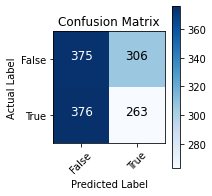

              precision    recall  f1-score   support

         0.0       0.50      0.55      0.52       681
         1.0       0.46      0.41      0.44       639

    accuracy                           0.48      1320
   macro avg       0.48      0.48      0.48      1320
weighted avg       0.48      0.48      0.48      1320



In [44]:
draw_confusion_matrix(clf_lr_1, x_test, y_test, "logistic_regression_sklearn")

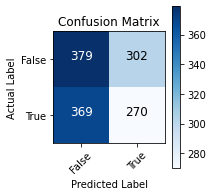

              precision    recall  f1-score   support

         0.0       0.51      0.56      0.53       681
         1.0       0.47      0.42      0.45       639

    accuracy                           0.49      1320
   macro avg       0.49      0.49      0.49      1320
weighted avg       0.49      0.49      0.49      1320



In [45]:
draw_confusion_matrix(clf_lr_2, x_test, y_test, "logistic_regression_numpy")

In [46]:
draw_roc(clf_lr_1, x_test, y_test, "logistic_regression")

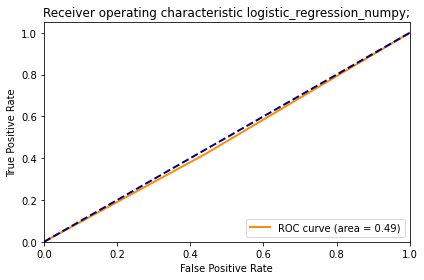

In [47]:
draw_roc(clf_lr_2, x_test, y_test, "logistic_regression_numpy") 

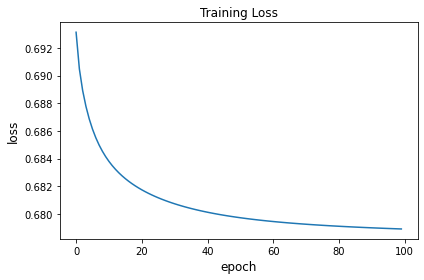

In [48]:
plt.figure()
plt.plot(history_lr)
plt.title("Training Loss")
plt.ylabel("loss", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.tight_layout()
plt.savefig(save_path + 'lr_learning_curve.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()
plt.close()

### 8-2. XGBoost 결과 분석 및 해석 

In [49]:
draw_confusion_matrix(xgb, x_test, y_test, "xgboost")

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79       681
         1.0       0.78      0.77      0.77       639

    accuracy                           0.78      1320
   macro avg       0.78      0.78      0.78      1320
weighted avg       0.78      0.78      0.78      1320



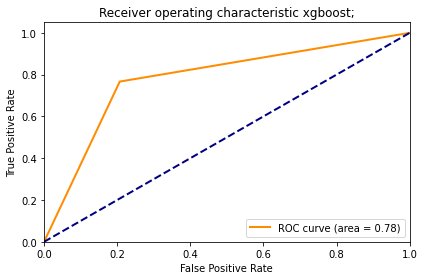

In [50]:
draw_roc(xgb, x_test, y_test, "xgboost")

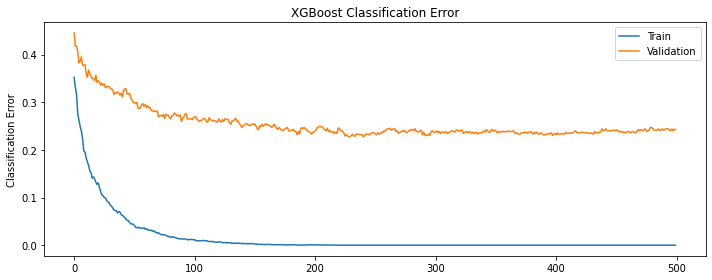

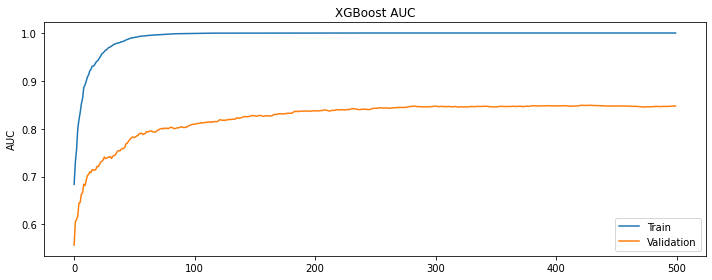

In [51]:
xgb_results = xgb.evals_result()  # xgboost 모델의 평가 결과 불러오기
epochs = len(xgb_results['validation_0']['error'])    # iteration 수
x_axis = range(0, epochs)  # x축(epoch) 범위 설정


# plot classification error
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, xgb_results['validation_0']['error'], label='Train')
ax.plot(x_axis, xgb_results['validation_1']['error'], label='Validation')
ax.legend()

plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.tight_layout()
plt.savefig(save_path + 'learning_curve_error_xgb.png', dpi=100, bbox_inches='tight')
plt.show()


# plot auc
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, xgb_results['validation_0']['auc'], label='Train')
ax.plot(x_axis, xgb_results['validation_1']['auc'], label='Validation')
ax.legend()

plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.tight_layout()
plt.savefig(save_path + 'learning_curve_auc_xgb.png', dpi=100, bbox_inches='tight')
plt.show()

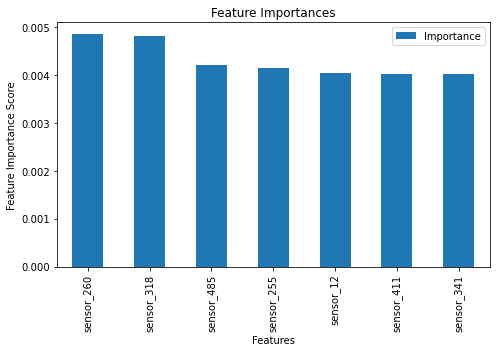

     Features  Importance
2  sensor_260    0.004858
3  sensor_318    0.004817
6  sensor_485    0.004204
1  sensor_255    0.004138
0   sensor_12    0.004037
5  sensor_411    0.004025
4  sensor_341    0.004024
['sensor_260', 'sensor_318', 'sensor_485', 'sensor_255', 'sensor_12', 'sensor_411', 'sensor_341']


In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

feat_imp = xgb.feature_importances_
idx = np.where(feat_imp > 0.004)
feat_imp_important = feat_imp[idx]
feat = ["sensor_{}".format(i+1) for i in idx[0]]
# clf.best_estimator_.booster().get_fscore()
res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp_important}).sort_values(by='Importance', ascending=False)
res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances', figsize = (7, 5) )
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.savefig(save_path + 'xgb_feature_importance.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()
print(res_df)
print(res_df["Features"].tolist())

### 8-3. RNN 결과 분석 및 해석

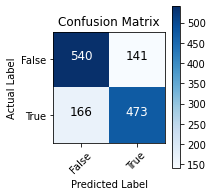

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78       681
         1.0       0.77      0.74      0.75       639

    accuracy                           0.77      1320
   macro avg       0.77      0.77      0.77      1320
weighted avg       0.77      0.77      0.77      1320



In [52]:
draw_confusion_matrix(rnn_model, x_test_exp, y_test, "rnn")

In [53]:
draw_roc(rnn_model, x_test_exp, y_test, "rnn")

In [54]:
plot_loss_graph(history_rnn, "rnn")

In [55]:
plot_prediction_graph(history_rnn, "rnn")

### 8-4. CNN 결과 분석 및 해석

In [56]:
draw_confusion_matrix(cnn_model, x_test_exp, y_test, "cnn")

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       681
         1.0       0.97      0.96      0.96       639

    accuracy                           0.96      1320
   macro avg       0.96      0.96      0.96      1320
weighted avg       0.96      0.96      0.96      1320



In [57]:
draw_roc(cnn_model, x_test_exp, y_test, "cnn")

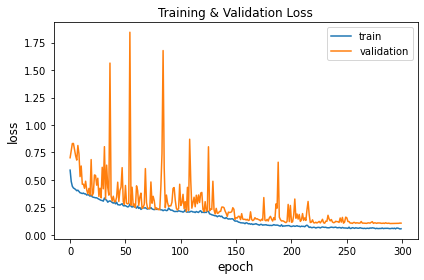

In [58]:
plot_loss_graph(history_cnn, "cnn")

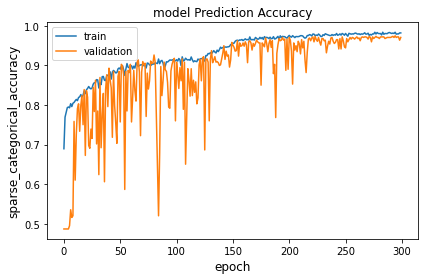

In [59]:
plot_prediction_graph(history_cnn, "cnn")

## 분석결과에 대한 논의 및 해석(implication)

가장 성능이 좋은 CNN 모델로 분석 결과를 보면,

*   Validation의 Prediction Accuracy와 Loss 값의 추이를 보면 130 Epoch 까지는 급격하게 흔들리다가, 이후부터는 안정화되어가는 것을 확인할 수 있다. 200 Epoch 부터는 성능 개선이 거의 없으며, 계속 학습을 진행할 경우 Validation Accuracy가 조금씩 떨어지는 것을 확인할 수 있는데 이는 모델이 Overfitting 되고 있음을 보여준다. 따라서 그림을 보고 Epoch 수(본 실험에서는 epoch=200)를 조절해주는 것이 바람직하다.
*    x축(1 - specificity = FPR(False Positive Rate))은 가짜 중에 진짜를 찾은 비율(가짜 중에 잘못 예측한 비율)이고, y축(Sensitivity)이 의미하는 바는 진짜 중에 진짜를 찾은 비율(진짜 중에 진짜를 잘 찾은 비율)이 된다. 진짜로 예측한 값들 중에서 실제로도 진짜일 경우가 실제로 가짜일 경우보다 높아야 AUC가 높게 나온다. 점선선은 랜덤으로 예측을 한 것이나 마찬가지로 성능이 가장 나쁜 경우이고, 곡선이 굽어지면 굽어질수록 AUC가 넓어지므로, 더욱 정확한 모델임을 알 수 있다.
*    confusion_matrix